# Postdam PM2.5 Deep Learning Forecasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
#pip install tensorflow==2.15.0

In [2]:
#pip install keras-tuner==1.4.6 

In [3]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [4]:
import model_base as mb
import deep_learning as dl


%env TF_ENABLE_ONEDNN_OPTS=0
print(os.environ["TF_ENABLE_ONEDNN_OPTS"])
# oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable

env: TF_ENABLE_ONEDNN_OPTS=0
0


## Data Exploration

* Load Data


In [5]:
df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()

120
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-31 to 2022-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5-Value  120 non-null    float64
 1   NO2-Value    120 non-null    float64
 2   O3-Value     120 non-null    float64
 3   SO2-Value    120 non-null    float64
 4   PM10-Value   120 non-null    float64
 5   Month sin    120 non-null    float64
 6   Month cos    120 non-null    float64
 7   Year sin     120 non-null    float64
 8   Year cos     120 non-null    float64
dtypes: float64(9)
memory usage: 9.4 KB
None
(120, 9)
(113, 6, 9)
{'Total Data Points': 120, 'Training Data Size': 67, 'Validation Data Size': 22, 'Testing Data Size': 24}
(67, 6, 9)
(22, 6, 9)
(24, 6, 9)
(67, 9)
(22, 9)
(24, 9)
Epoch 1/10


2023-12-25 00:21:31.763736: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-25 00:21:31.763763: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-25 00:21:31.763767: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-25 00:21:31.763803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-25 00:21:31.763819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


3/3 [==============================] - ETA: 0s - loss: 1.1145 - mean_absolute_error: 0.8801

2023-12-25 00:21:32.148473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 89ms/step - loss: 1.1145 - mean_absolute_error: 0.8801 - val_loss: 0.6753 - val_mean_absolute_error: 0.6522
Epoch 2/10
3/3 [==============================] - 0s 30ms/step - loss: 0.7795 - mean_absolute_error: 0.7111 - val_loss: 0.5383 - val_mean_absolute_error: 0.5764
Epoch 3/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6147 - mean_absolute_error: 0.6130 - val_loss: 0.4554 - val_mean_absolute_error: 0.5277
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.5211 - mean_absolute_error: 0.5561 - val_loss: 0.3846 - val_mean_absolute_error: 0.4818
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 0.4388 - mean_absolute_error: 0.5043 - val_loss: 0.3148 - val_mean_absolute_error: 0.4374
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 0.3627 - mean_absolute_error: 0.4594 - val_loss: 0.2467 - val_mean_absolute_error: 0.3954
Epoch 7/10
3/3 [=============================

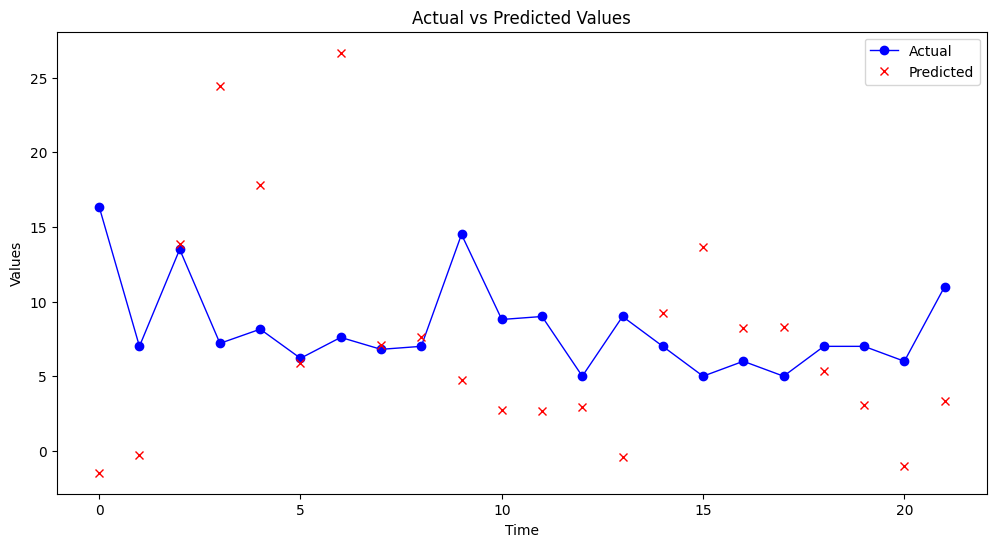

MAE: 6.4936
MSE: 73.2183
RMSE: 8.5568
MAPE: 3.8781
MASE: 1.0709662107147602


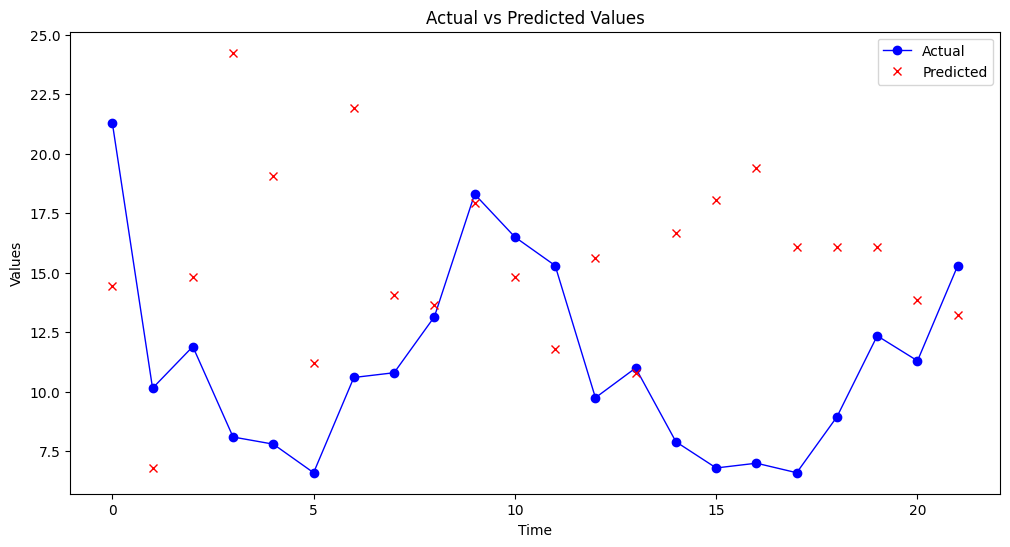

MAE: 5.8755
MSE: 54.0014
RMSE: 7.3486
MAPE: 0.3562
MASE: 1.354462341142212


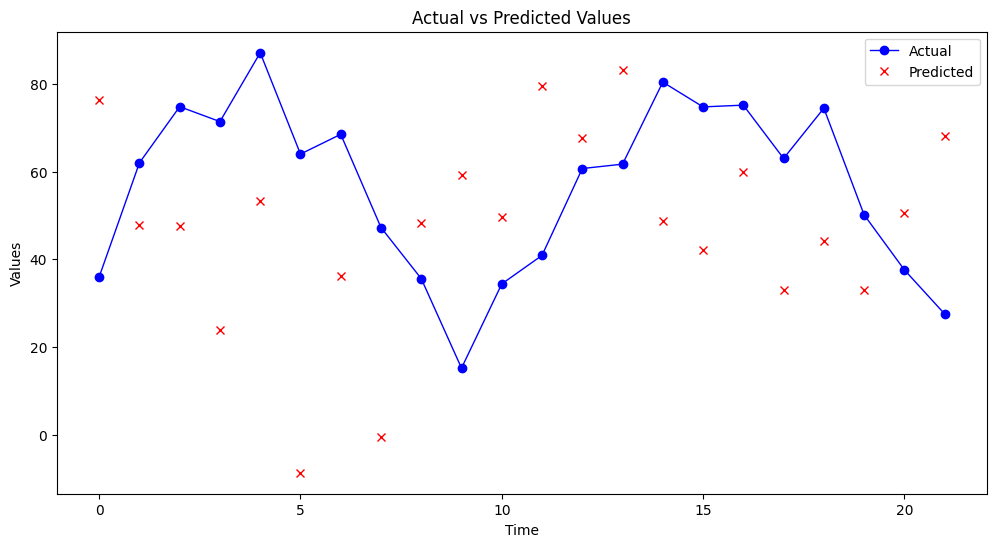

MAE: 30.2388
MSE: 1142.3347
RMSE: 33.7984
MAPE: 5.1564
MASE: 1.2803777825142495


In [6]:
dl.cnn_lstm(df_monthly)

# Artificial Neural Network (ANN)

An Artificial Neural Network (ANN) is a computational model based on the structure and functions of biological neural networks. Information flows through networks of interconnected nodes, or neurons, each processing input and passing their output to the next layer. These networks are capable of learning complex patterns using algorithms that adjust connections between neurons based on the input data.

ANNs consist of input, hidden, and output layers. The hidden layers can perform nonlinear transformations on the inputs, allowing ANNs to model complex relationships. They're applied in various fields like image and speech recognition, natural language processing, and predictive analytics.

Comparatively, a Recurrent Neural Network (RNN) is specialized for processing sequences, capturing temporal dependencies by using loops within the network. However, standard RNNs struggle with long-term dependencies due to issues like vanishing gradients.

Long Short-Term Memory (LSTM) networks are a type of RNN designed to overcome this limitation. They include mechanisms called gates that regulate the flow of information and allow the network to retain or discard data over long sequences, making them more effective for tasks like time series analysis and language modeling.

Convolutional Neural Networks (CNNs) are another specialized kind of ANN designed for grid-like data, such as images. CNNs employ filters to perform convolution operations that capture spatial hierarchies and features, making them powerful for image and video recognition tasks.

Each type of network—ANN, RNN, LSTM, and CNN—serves different purposes and excels in different applications, from the general pattern recognition of ANNs to the nuanced temporal or spatial data handling in RNNs, LSTMs, and CNNs, respectively.


* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

In [7]:
# # Train and Evolve

# # Hourly
# dl.ann_train_and_evaluate(df_hourly)

# # Daily
# dl.ann_train_and_evaluate(df_daily, 'D')

# # Weekly
# dl.ann_train_and_evaluate(df_weekly, 'W')

# # Monthly
# dl.ann_train_and_evaluate(df_monthly, 'M')


In [8]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.ann_tune_and_evolve(df_hourly)

In [9]:
# # Daily
# daily_best_model, daily_best_hp = dl.ann_tune_and_evolve(df_daily, 'D')

In [10]:

# # Weekly
# weekly_best_model, weekly_best_hp = dl.ann_tune_and_evolve(df_weekly, 'W')

In [11]:

# Monthly
# monthly_best_model, monthly_best_hp = dl.ann_tune_and_evolve(df_monthly, 'M')

# LSTM

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

In [12]:
# # Train and Evolve

# # Hourly
# dl.lstm_train_and_evaluate(df_hourly)

# # Daily
# dl.lstm_train_and_evaluate(df_daily, 'D')

# # Weekly
# dl.lstm_train_and_evaluate(df_weekly, 'W')

# # Monthly
# dl.lstm_train_and_evaluate(df_monthly, 'M')


In [13]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.lstm_tune_and_evolve(df_hourly)

In [14]:

# # # Daily
# daily_best_model, daily_best_hp = dl.lstm_tune_and_evolve(df_daily, 'D')

In [15]:

# # # Weekly
# weekly_best_model, weekly_best_hp = dl.lstm_tune_and_evolve(df_weekly, 'W')

In [16]:

# # # Monthly
# monthly_best_model, monthly_best_hp = dl.lstm_tune_and_evolve(df_monthly, 'M')

# CNN 

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

In [17]:
# Train and Evolve

# # Hourly
# dl.cnn_train_and_evaluate(df_hourly)

# # Daily
# dl.cnn_train_and_evaluate(df_daily, 'D')

# # Weekly
# dl.cnn_train_and_evaluate(df_weekly, 'W')

# # Monthly
# dl.cnn_train_and_evaluate(df_monthly, 'M')

In [18]:
# Train and Evolve

# # Hourly
# dl.cnn_train_and_evaluate(df_hourly)

# # Daily
# dl.cnn_train_and_evaluate(df_daily, 'D')

# # Weekly
# dl.cnn_train_and_evaluate(df_weekly, 'W')

# # Monthly
# dl.cnn_train_and_evaluate(df_monthly, 'M')

In [19]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.cnn_tune_and_evolve(df_hourly)

In [20]:
# # Daily
# daily_best_model, daily_best_hp = dl.cnn_tune_and_evolve(df_daily)

In [21]:
# # Weekly
# weekly_best_model, weekly_best_hp = dl.cnn_tune_and_evolve(df_weekly)

In [22]:
# # Monthly
# monthly_best_model, monthly_best_hp = dl.cnn_tune_and_evolve(df_monthly)